In [4]:
# Importar paquetes
import pandas as pd
import matplotlib.pyplot as plt
import random as ra
import numpy as np
import pickle
%matplotlib inline

#Automcompletar rápido
%config IPCompleter.greedy=True
#Desactivar la notación científica
pd.options.display.float_format = '{:.3f}'.format


In [39]:
#Google Drive
from google.colab import drive
drive.mount('/content/drive')

BASE = '/content/drive/MyDrive/PC1_OLIVA'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [42]:
csv_path = f"{BASE}/PC1_OLIVA.csv"
df_pasos.to_csv(csv_path, index=False)

In [8]:
dates = pd.date_range(start='2025-01-01', end='2025-01-31')

pasos_A = np.random.randint(3000, 15001, size=len(dates))
pasos_B = np.random.randint(3000, 15001, size=len(dates))

df_pasos = pd.DataFrame({'Fecha': dates, 'Persona A': pasos_A, 'Persona B': pasos_B})

for persona in ['Persona A', 'Persona B']:
    missing_indices = ra.sample(range(len(df_pasos)), 2)
    df_pasos.loc[missing_indices, persona] = np.nan
display(df_pasos)

,Fecha,Persona A,Persona B
0,2025-01-01,10625.000,9360.000
1,2025-01-02,5609.000,10078.000
2,2025-01-03,8420.000,NaN
3,2025-01-04,11051.000,7979.000
4,2025-01-05,NaN,14191.000
5,2025-01-06,5965.000,6567.000
6,2025-01-07,12756.000,6505.000
7,2025-01-08,5491.000,12331.000
8,2025-01-09,5209.000,5367.000
9,2025-01-10,12749.000,5594.000


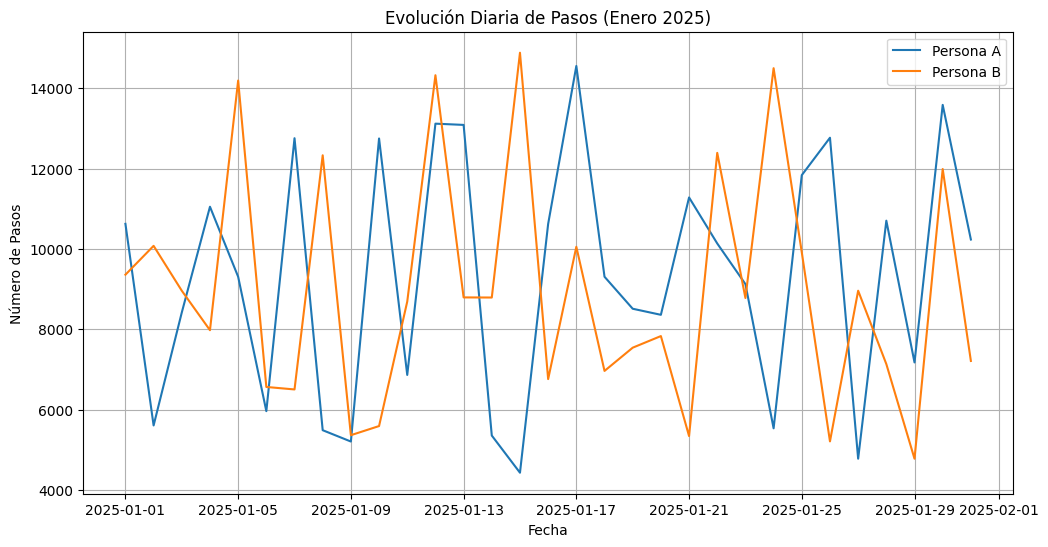

In [37]:
#Gráfico de líneas con la evolución diaria de los pasos de Persona A y Persona B.
plt.figure(figsize=(12, 6))
plt.plot(df_pasos['Fecha'], df_pasos['Persona A'], label='Persona A')
plt.plot(df_pasos['Fecha'], df_pasos['Persona B'], label='Persona B')
plt.xlabel('Fecha')
plt.ylabel('Número de Pasos')
plt.title('Evolución Diaria de Pasos (Enero 2025)')
plt.legend()
plt.grid(True)
plt.show()

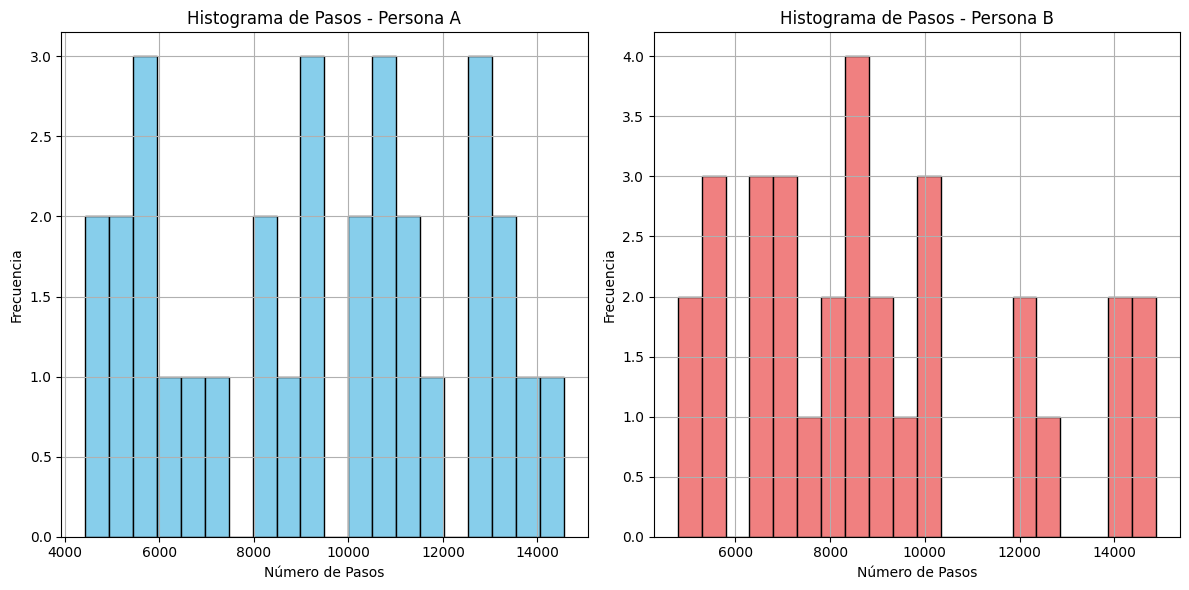

In [36]:
# Histogramas de los pasos de Persona A y Persona B
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(df_pasos['Persona A'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Número de Pasos')
plt.ylabel('Frecuencia')
plt.title('Histograma de Pasos - Persona A')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.hist(df_pasos['Persona B'], bins=20, color='lightcoral', edgecolor='black')
plt.xlabel('Número de Pasos')
plt.ylabel('Frecuencia')
plt.title('Histograma de Pasos - Persona B')
plt.grid(True)
plt.tight_layout()
plt.show()

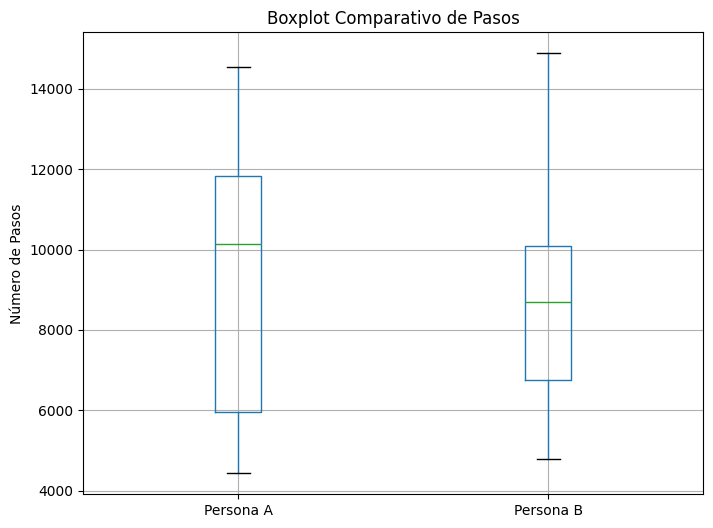

In [13]:
# Boxplot comparativo de los pasos de Persona A y Persona B
plt.figure(figsize=(8, 6))
df_pasos[['Persona A', 'Persona B']].boxplot()
plt.ylabel('Número de Pasos')
plt.title('Boxplot Comparativo de Pasos')
plt.grid(True)
plt.show()

In [35]:
# Imputa valores faltantes con la media de cada persona
mean_persona_a = df_pasos['Persona A'].mean()
mean_persona_b = df_pasos['Persona B'].mean()

df_pasos['Persona A'].fillna(mean_persona_a, inplace=True)
df_pasos['Persona B'].fillna(mean_persona_b, inplace=True)

display(df_pasos)

/tmp/ipython-input-2421165332.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_pasos['Persona A'].fillna(mean_persona_a, inplace=True)
/tmp/ipython-input-2421165332.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True

,Fecha,Persona A,Persona B
0,2025-01-01,10625.000,9360.000
1,2025-01-02,5609.000,10078.000
2,2025-01-03,8420.000,8961.310
3,2025-01-04,11051.000,7979.000
4,2025-01-05,9308.966,14191.000
5,2025-01-06,5965.000,6567.000
6,2025-01-07,12756.000,6505.000
7,2025-01-08,5491.000,12331.000
8,2025-01-09,5209.000,5367.000
9,2025-01-10,12749.000,5594.000


In [25]:

# El máximo de pasos de la Persona A
max_pasos_a = df_pasos['Persona A'].max()
print(f"El máximo de pasos de la Persona A fue: {max_pasos_a:.3f}")

# El mínimo de pasos de Persona B
min_pasos_b = df_pasos['Persona B'].min()
print(f"El mínimo de pasos de Persona B fue: {min_pasos_b:.3f}")

# El promedio de pasos de Persona A
mean_pasos_a = df_pasos['Persona A'].mean()
print(f"El promedio de pasos de Persona A fue: {mean_pasos_a:.3f}")

# El promedio de pasos de Persona B
mean_pasos_b = df_pasos['Persona B'].mean()
print(f"El promedio de pasos de Persona B fue: {mean_pasos_b:.3f}")

# El número de días en los que Persona A superó los 10,000 pasos
dias_a_mas_de_10000 = df_pasos[df_pasos['Persona A'] > 10000].shape[0]
print(f"El número de días en los que Persona A superó los 10000 pasos: {dias_a_mas_de_10000}")

El máximo de pasos de la Persona A fue: 14553.000
El mínimo de pasos de Persona B fue: 4781.000
El promedio de pasos de Persona A fue: 9308.966
El promedio de pasos de Persona B fue: 8961.310
El número de días en los que Persona A superó los 10000 pasos: 15


In [29]:
df_pasos.to_pickle('/content/drive/MyDrive/PC1_OLIVA/Oliva.pickle')
df_cargado = pd.read_pickle('/content/drive/MyDrive/PC1_OLIVA/Oliva.pickle')
display(df_cargado)

,Fecha,Persona A,Persona B
0,2025-01-01,10625.000,9360.000
1,2025-01-02,5609.000,10078.000
2,2025-01-03,8420.000,8961.310
3,2025-01-04,11051.000,7979.000
4,2025-01-05,9308.966,14191.000
5,2025-01-06,5965.000,6567.000
6,2025-01-07,12756.000,6505.000
7,2025-01-08,5491.000,12331.000
8,2025-01-09,5209.000,5367.000
9,2025-01-10,12749.000,5594.000
